In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline
plt.style.use('fivethirtyeight')

df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv', parse_dates=['Date'])
df['Total Cases']=df[['Confirmed','Recovered','Deaths']].sum(axis=1)


<function matplotlib.pyplot.show(close=None, block=None)>

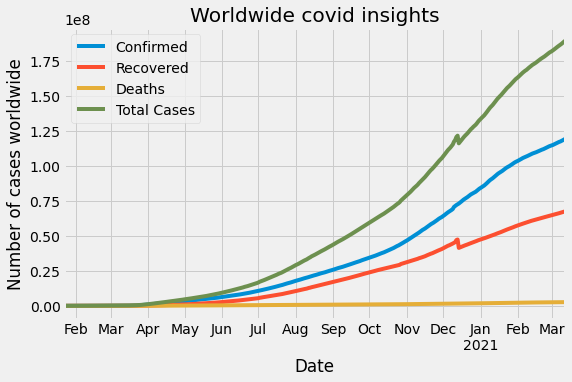

In [18]:
#worldwide cases
worldwide_df=df.groupby(['Date']).sum()
w=worldwide_df.plot(figsize=(8,5))
w.set_xlabel('Date')
w.set_ylabel('Number of cases worldwide')
w.title.set_text('Worldwide covid insights')
plt.show


<ipython-input-46-2c96a3651d34>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot(worldwide_df[['Total Cases']],Label='worldwide')


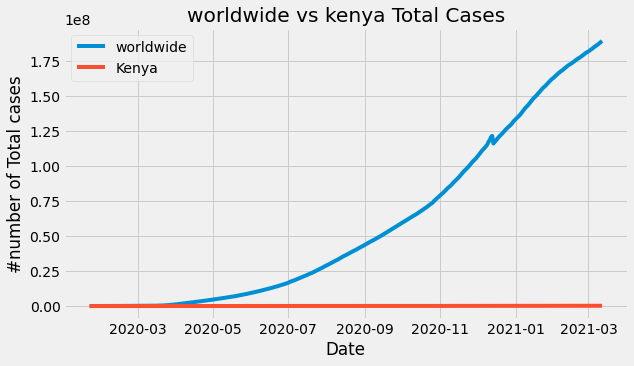

In [46]:
us_df = df[df['Country']=='Kenya'].groupby(['Date']).sum()

fig=plt.figure(figsize=(9,5))
ax=fig.add_subplot(111)

ax.plot(worldwide_df[['Total Cases']],Label='worldwide')
ax.plot(us_df[['Total Cases']],label='Kenya')
ax.set_xlabel('Date')
ax.set_ylabel('#number of Total cases')
ax.title.set_text('worldwide vs kenya Total Cases')

plt.legend(loc='upper left')
plt.show()


<ipython-input-33-d80721e6df9f>:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.bar(us_df['Date'], us_df['Daily Confirmed'],color='b',Label='US Daily Confirmed Cases')


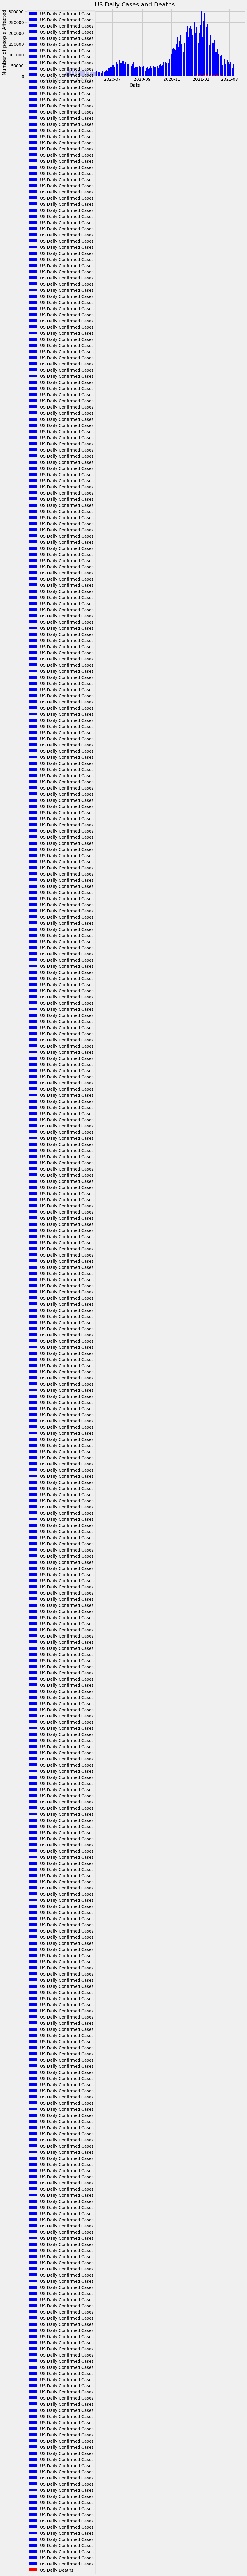

In [33]:

us_df=us_df.reset_index()
us_df['Daily Confirmed']=us_df['Confirmed'].sub(us_df['Confirmed'].shift())
us_df['Daily Deaths']=us_df['Deaths'].sub(us_df['Deaths'].shift())

fig=plt.figure(figsize=(12,4))
ax=fig.add_subplot(111)

ax.bar(us_df['Date'], us_df['Daily Confirmed'],color='b',Label='US Daily Confirmed Cases')
ax.bar(us_df['Date'], us_df['Daily Deaths'], color='r',label='US Daily Deaths')
ax.set_xlabel('Date')
ax.set_ylabel('Number of people Affected')
ax.title.set_text('US Daily Cases and Deaths')

plt.legend(loc='upper left')
plt.show()


<ipython-input-37-94083c6d9e90>:13: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax.pie(top_10['Confirmed'], labels=top_10['Country'], autopct='%1.1f%%')


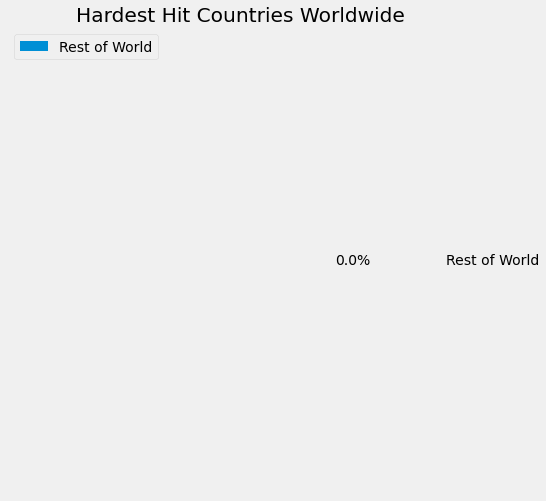

In [37]:
from datetime import date, timedelta
yesterday = date.today() - timedelta(days=1)
yesterday.strftime('%Y-%m-%d')

today_df = df[df['Date']==yesterday]
top_10 = today_df.sort_values(['Confirmed'], ascending=False)[:10]
top_10.loc['rest-of-world'] = today_df.sort_values(['Confirmed'], ascending=False)[10:].sum()
top_10.loc['rest-of-world', 'Country'] = 'Rest of World'

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

ax.pie(top_10['Confirmed'], labels=top_10['Country'], autopct='%1.1f%%')
ax.title.set_text('Hardest Hit Countries Worldwide')

plt.legend(loc='upper left')
plt.show()